In [11]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('winequality-red.csv', delimiter=';')

# Convert the 'quality' column to binary labels
df['quality'] = df['quality'].apply(lambda x: 1 if x > 5 else 0)

# Features matrix
X = df.drop('quality', axis=1)

# Labels vector
y = df['quality']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40, random_state=42)

# Define the model
model = DecisionTreeClassifier(max_depth=12, random_state=0)

# Train the model on the training set
model.fit(X_train, y_train)

# Evaluate accuracy on training and testing sets
train_accuracy = accuracy_score(y_train, model.predict(X_train))
test_accuracy = accuracy_score(y_test, model.predict(X_test))

print(f"Training Accuracy: {train_accuracy * 100:.2f}%")
print(f"Testing Accuracy: {test_accuracy * 100:.2f}%")

Training Accuracy: 98.96%
Testing Accuracy: 72.81%


Training Accuracy (Random Forest): 99.90%
Testing Accuracy (Random Forest): 80.16%


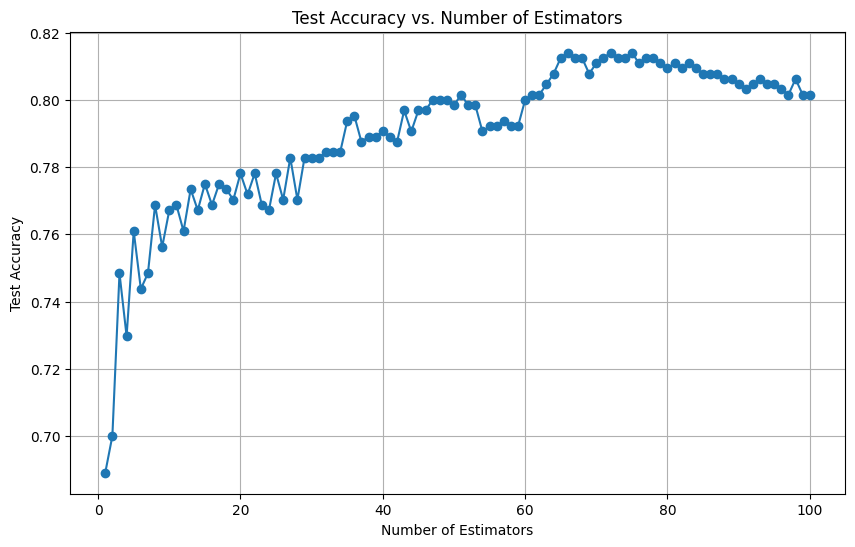

In [12]:
# Define the model
rf_model = RandomForestClassifier(n_estimators=100, max_depth=12, random_state=0)

# Train the model on the training set
rf_model.fit(X_train, y_train)

# Evaluate accuracy on training and testing sets
train_accuracy_rf = accuracy_score(y_train, rf_model.predict(X_train))
test_accuracy_rf = accuracy_score(y_test, rf_model.predict(X_test))

print(f"Training Accuracy (Random Forest): {train_accuracy_rf * 100:.2f}%")
print(f"Testing Accuracy (Random Forest): {test_accuracy_rf * 100:.2f}%")

test_accuracies = []

# Calculate the accuracy for each number of trees between 1 and 100
for n in range(1, 101):
    rf_model = RandomForestClassifier(n_estimators=n, max_depth=12, random_state=0)
    rf_model.fit(X_train, y_train)
    test_accuracy = accuracy_score(y_test, rf_model.predict(X_test))
    test_accuracies.append(test_accuracy)

# Display the graph
plt.figure(figsize=(10, 6))
plt.plot(range(1, 101), test_accuracies, marker='o')
plt.title('Test Accuracy vs. Number of Estimators')
plt.xlabel('Number of Estimators')
plt.ylabel('Test Accuracy')
plt.grid(True)
plt.show()

Training Accuracy (Random Forest with all features): 99.90%
Testing Accuracy (Random Forest with all features): 78.75%


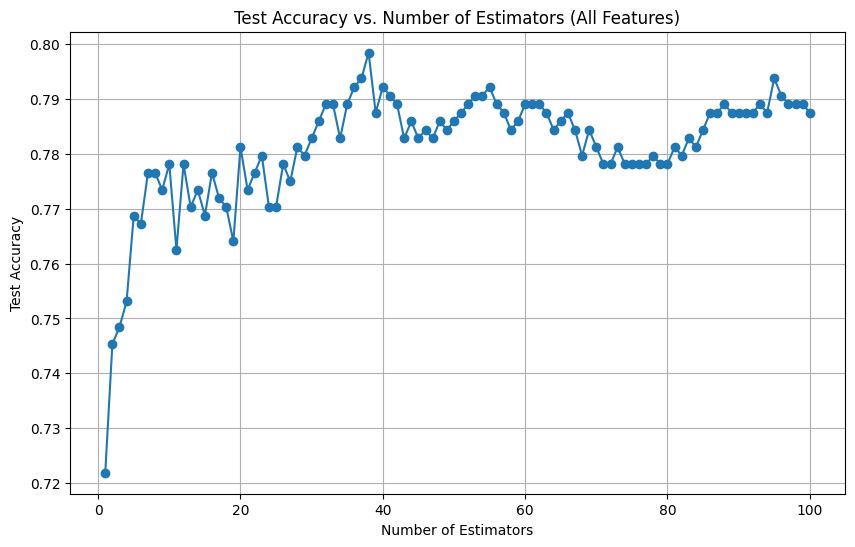

In [14]:
# Define the model
rf_model_no_random = RandomForestClassifier(n_estimators=100, max_depth=12, random_state=0, max_features=None)

# Train the model on the training set
rf_model_no_random.fit(X_train, y_train)

# Evaluate accuracy on training and testing sets
train_accuracy_rf_no_random = accuracy_score(y_train, rf_model_no_random.predict(X_train))
test_accuracy_rf_no_random = accuracy_score(y_test, rf_model_no_random.predict(X_test))

print(f"Training Accuracy (Random Forest with all features): {train_accuracy_rf_no_random * 100:.2f}%")
print(f"Testing Accuracy (Random Forest with all features): {test_accuracy_rf_no_random * 100:.2f}%")

test_accuracies_no_random = []

# Calculate the accuracy for each number of trees between 1 and 100
for n in range(1, 101):
    rf_model_no_random = RandomForestClassifier(n_estimators=n, max_depth=12, random_state=0, max_features=None)
    rf_model_no_random.fit(X_train, y_train)
    test_accuracy = accuracy_score(y_test, rf_model_no_random.predict(X_test))
    test_accuracies_no_random.append(test_accuracy)

# Display the graph
plt.figure(figsize=(10, 6))
plt.plot(range(1, 101), test_accuracies_no_random, marker='o')
plt.title('Test Accuracy vs. Number of Estimators (All Features)')
plt.xlabel('Number of Estimators')
plt.ylabel('Test Accuracy')
plt.grid(True)
plt.show()
